# Correlation Analysis

 The goal of this step is to find out important relationships between features. We will follow the procedures below to find the correlation between the features.

&nbsp; &nbsp; **1. Convert categorical values into numerical values.**

&nbsp; &nbsp; **2.  Analyze correlation between 'Purchase' and other features.**

&nbsp; &nbsp; **3. Produce user data and analyze the correlation.**

&nbsp; &nbsp; **4. Analyze correlation between 'Product Category' and other features.**



<br>


 Before the start, we'll use the clean data that we got in the first step, **Exploratory Data Analysis**. At the first step, we found that there are lots of missing values in `Product_Category_2` and `Product_Category_3`. We thought that these columns are related to the values in `Product_Category_1`, so we'll use only `Product_Category_1` in correlation analysis. 

In [1]:
import os
import seaborn as sns
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BlackFriday.csv')
data_c = data

In [3]:
del_columns = ['Product_Category_2', 'Product_Category_3']
data_c.drop(del_columns, inplace=True, axis=1)
data_c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


 We deleted the column `Product_Category_2` and `Product_Category_3` like the table above. In the case of product category, we'll only use `Product_Category_1` in the latter steps. 

## 1. Convert Categorical values into numerical values

 To find the correlation between the features, each feature should be converted into numerical values. Let's look at the data types and unique values of each feature.

In [4]:
# data type of each feature
data_c.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

In [5]:
# number of unique values of each feature
data_c.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

<br>

`Gender` : There are two types of gender(female and male) so we can make this binary. 

`Age` : This column presents 7 age groups. Age should be treated as numerical, so we can convert the variables into 0 - 7.

`City_Category` : This column has 3 types of cities. It consists of A, B and C. So, we can convert the variables into 0 - 7.

`Stay_In_Current_City_Years` : The '+' symbol should be treated.

#### 1.1. Convert `Gender` into binary values

In [6]:
# Convert F -> 1, M -> 0 
data_c['Gender'] = (data_c['Gender'] == 'F').astype(int)
data_c.Gender.value_counts()

0    405380
1    132197
Name: Gender, dtype: int64

#### 1.2. Convert `Age` into numerical values

In [7]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data_c["Age"] = data_c["Age"].apply(lambda line: age_dict[line])
data_c.Age.value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

#### 1.3. Convert `City_Category` into numerical values

In [8]:
# There exists 'A' 'B' 'C' in City_Category
# Giving City_Category Numerical values
city_dict = {'A':0, 'B':1, 'C':2 }
data_c["City_Category"] = data_c["City_Category"].apply(lambda line: city_dict[line])
data_c.City_Category.value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

#### 1.4. Convert `Stay_In_Current_City` into numerical values

In [9]:
# Giving City_Category Numerical values
# Convert 4+ into 4
city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4 }
data_c["Stay_In_Current_City_Years"] = data_c["Stay_In_Current_City_Years"].apply(lambda line: city_dict[line])
data_c.Stay_In_Current_City_Years.value_counts()

1    189192
2     99459
3     93312
4     82889
0     72725
Name: Stay_In_Current_City_Years, dtype: int64

In [10]:
data_c.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370
1,1000001,P00248942,1,0,10,0,2,0,1,15200
2,1000001,P00087842,1,0,10,0,2,0,12,1422
3,1000001,P00085442,1,0,10,0,2,0,12,1057
4,1000002,P00285442,0,6,16,2,4,0,8,7969


 Therefore, we got the data of the numerical features through the process above. We'll use this converted data in the correlation analysis.

<br>
<br>

 Before we get into **Step 2**,  we'll visualize the **pearson** correlation between all numeric features of the data that we converted through the previous proceeses. 

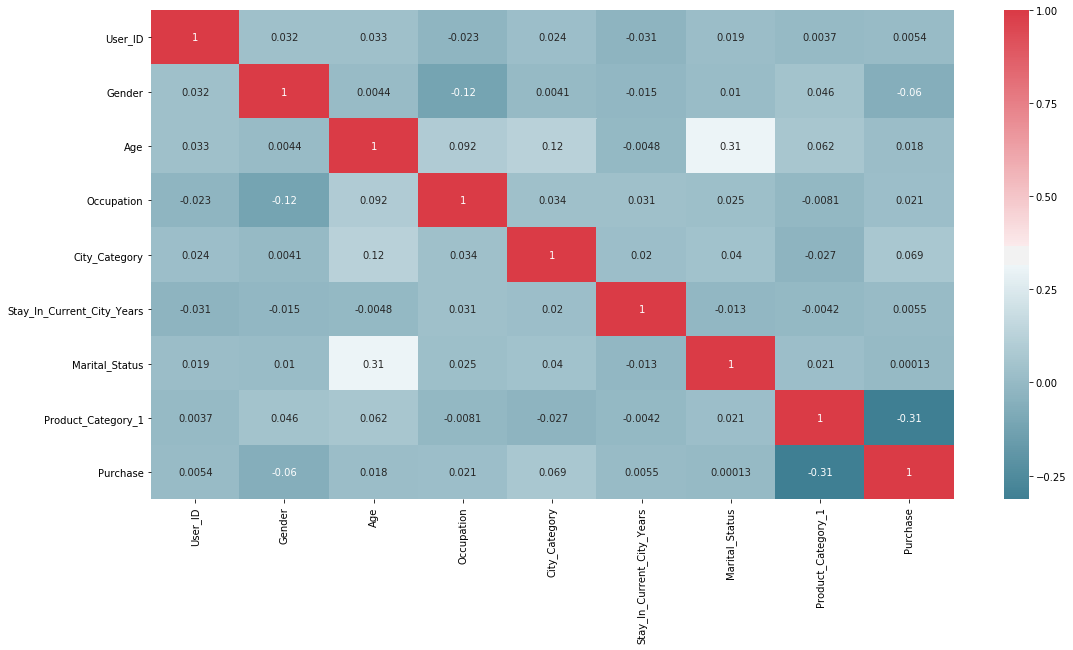

In [11]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = data_c.corr(method = 'pearson')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

<br>

## 2. Analyze Correlation between `Purchase` and other features

 At first, we are going to find the correlation between **`Purchase`** and other numerical features. We'll get this correlation using the **pearson** method and **spearman** method.

#### 2.1. Pearson Correlation between `Purchase` and other numerical features

In [34]:
#pearson correlation between Purchase and other features
numeric_features = data_c.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase                      1.000000
City_Category                 0.068507
Occupation                    0.021104
Age                           0.017717
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Gender                       -0.060086
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 



  The above table shows that `City_Category`, the **type of city** has the highest correlation value with the `Purchase` (the price of the product) among the other numerical features. But still, correlation value is low. For clear understanding of the relationship between the `City_Category` and `Purchase`, let's visualize `Purchase` and `City_Category`. 

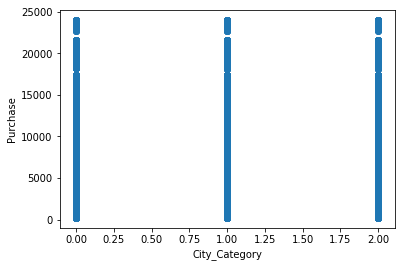

In [13]:
# scatter plot x-> City_Category, y -> Purchase
plt.scatter(data_c['City_Category'], data_c['Purchase'])
plt.xlabel('City_Category')
plt.ylabel('Purchase')
# Show plot
plt.show()

 As we can see in this scatter plot, the distribution of the `Purchase` with the `CIty_Category` is not clear. Therefore, it might be hard to say that `City_Category` is correlatted with the `Purchase`, the price of the product item that the user bought. We'll deal with this contents in detail in **3.1**. 

#### 2.2 Spearman Correlation between `Purchase` and other numerical features

 Through the previous step **2.1**, we found the pearson correlation between `Purchase` and other features. In this step, we'll get the spearman correlation. For the meaningful result, we are going to use the part of the numerical features. We'll select rank-ordered features.

In [14]:
#selected features to use in spearman correlation analysis
selected_features = {"Stay_In_Current_City_Years", "Age", "Purchase"}

We selected the features that have continuous values `Stay_In_Current_City_Years` and `Age` to use in Spearman correlation analysis. The features that have the categorical values semantically are excluded. The table below is the result of the Spearman correlation between `Purchase` and the selected features.

In [15]:
# spearman correlation value between Purchase and selected features
spear_data = data_c[selected_features]
corr = spear_data.corr(method = 'spearman')
print (corr['Purchase'].sort_values(ascending=False)[:10],'\n') 

Purchase                      1.000000
Age                           0.021708
Stay_In_Current_City_Years    0.006011
Name: Purchase, dtype: float64 



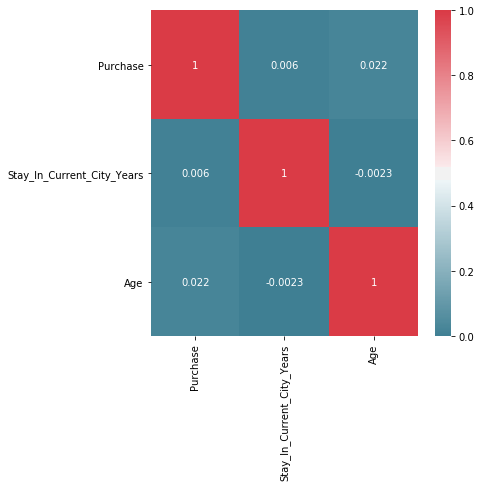

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
corrmat = data_c[selected_features].corr(method = 'spearman')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

We can see that `Age` has the highest spearman correlation with `Purchase` among the selected features. The heatmap above is the visualization of the spearman correlation between the selected features.

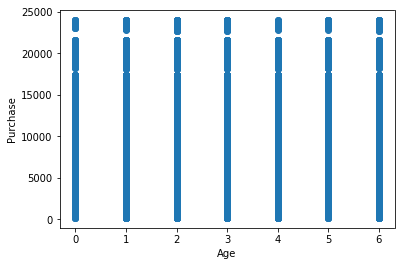

In [33]:
# scatter plot x->Age, y->Purchase
plt.scatter(data_c['Age'], data_c['Purchase'])
plt.xlabel('Age')
plt.ylabel('Purchase')
# Show plot
plt.show()

 As we can see in this scatter plot, it is hard to say that `Age` is correlated with the price of the product, even though `Age` has the highest sperman correlation value with `Purchase` among the features. 

<br>

## 3.  Produce user data and analyze the correlation.

 We can create the **`user_data`** using the original features and some additional features. We'll calculate the amount of purchase of each user and the number of products that each user bought.

In [35]:
#group by user id and create count column. It counts the product numbers that each user bought.
temp = data_c.groupby(['User_ID']).count()

#get the sum of Purchase of each user.
temp['sumPurchase'] = data_c.groupby(['User_ID'])['Purchase'].sum()
df2 = pd.DataFrame({'User_ID':temp['Product_ID'].index, 'countProduct':temp['Product_ID'].values, 'sumPurchase':temp['sumPurchase']})

#create user_data
user_data = data_c.join(df2.set_index('User_ID'), on='User_ID').sort_values(['User_ID'])

#drop the rows for the duplicate user_id. 
user_data = user_data.drop_duplicates(["User_ID"], keep="first")
user_data = user_data.reset_index(drop = True)
user_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,countProduct,sumPurchase
0,1000001,P00069042,1,0,10,0,2,0,3,8370,34,333481
1,1000002,P00289342,0,6,16,2,4,0,5,5260,76,810353
2,1000003,P00117042,0,2,15,0,3,0,1,3938,29,341635
3,1000004,P00329542,0,4,7,1,2,1,1,3849,13,205987
4,1000005,P00147942,0,2,20,0,1,1,1,15466,106,821001


 <br>
 
 We calculated the total amount of purchase of each user as `sumPurchase` and the number of products that each user bought as `countProduct` to create the user's data. We thought that information about the product is unneccessary in the `user_data`. Thus, we'll delete the columns of `Product_ID` and `Product_Category_1` to create the users' data.  

In [18]:
del_columns = ['Product_ID', 'Product_Category_1']
user_data.drop(del_columns, axis=1, inplace = True)

In [19]:
user_data.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase',
       'countProduct', 'sumPurchase'],
      dtype='object')

<br>

With this `user_data`, we'll find the correlation between the features.

#### 3.1. Pearson correlation between the features of `user_data`

 Let's see the correlation between the `sumPurchase` and other numerical eatures of `user_data`. 

In [36]:
numeric_features = user_data.select_dtypes(include=[np.number])
corr = numeric_features.corr(method = 'pearson')
print (corr['sumPurchase'].sort_values(ascending=False)[:10],'\n')

sumPurchase                   1.000000
countProduct                  0.978977
Stay_In_Current_City_Years    0.003296
Occupation                    0.000419
Product_Category_1           -0.005089
User_ID                      -0.014669
Marital_Status               -0.020592
Purchase                     -0.033442
Age                          -0.068740
Gender                       -0.102781
Name: sumPurchase, dtype: float64 



 `countProduct` has extremly high correlation value with `sumPurchase`. So, we thought that we do not have to calculate the correlation between `countProduct` and other numeric features of `user_data`. We guessed that the result of the correlation between `countProduct` and other features would be similar to the result of the correlation between `sumPurchase` and other features as we got previously. 

 In contrast,  `City_Category` has the lowest correlation value with `sumPurchase`. But it does not imply that `City_Category` is anti-correlated with `sumPurchase`. This is because `City_Category` is encoded as 0, 1 and 2, and there is no metadata of the `City_Category`. For more details, let's visualize the `City_Category` values with `sumPurchase` and `countProduct`.

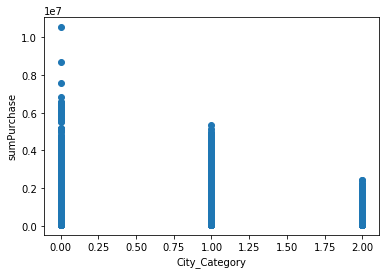

In [21]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['City_Category'],user_data['sumPurchase'])
plt.xlabel('City_Category')
plt.ylabel('sumPurchase')
# Show plot
plt.show()

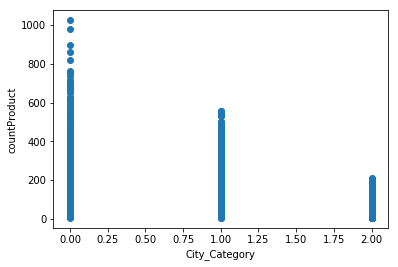

In [22]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['City_Category'],user_data['countProduct'])
plt.xlabel('City_Category')
plt.ylabel('countProduct')
# Show plot
plt.show()

 First scatter plot shows the distribution of `sumPurchase` with the `City_Category`. Similarly, second scatter plot shows the distribution of `countProduct` with the `City_Category`. These two scatter plots show that people who live in **City_Category 1** tend to buy more products and spend more money than **City_Category 2** and **City_Category 3**. Therefore, as the encoded number of `City_Category` increases, people tend to buy less items and spend less money to the products. This is why the correlation value between `City_Category` and `sumPurchase` is negative. This negative value does not imply that these two features are anti-correlated. Rather, we can say that this `City_Category` has a meaningful relationship between the user's comsumption pattern. Even though we do not have the metadata for the `City_Category`, we can assume that **City_Category 1** is relatively richer than other cities like **City_Category 2 and 3.** 
 

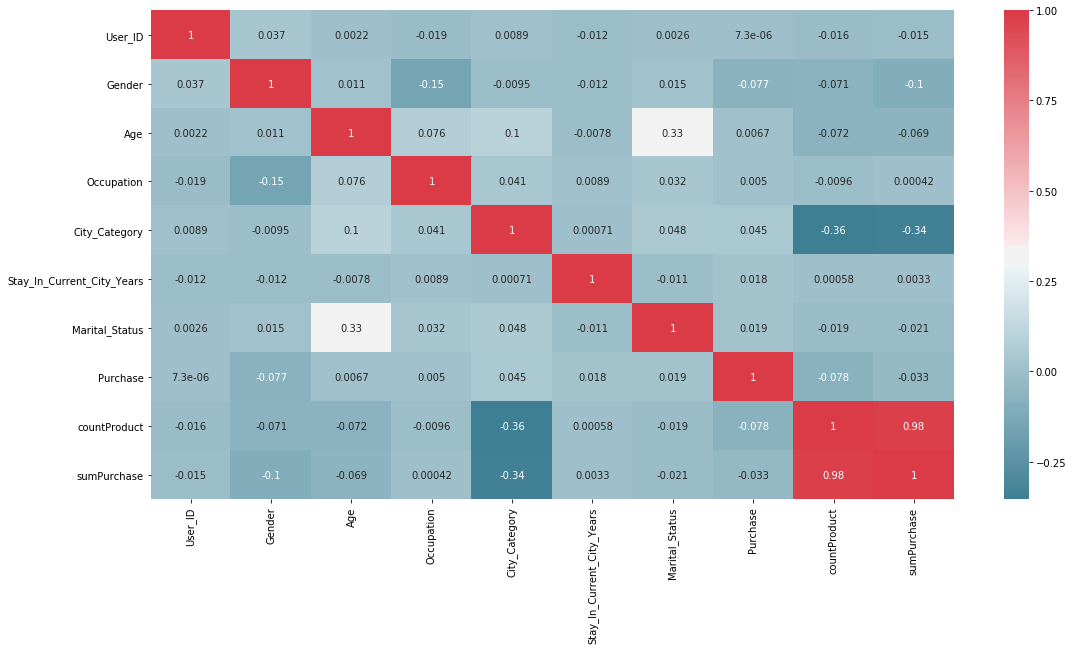

In [23]:
f, ax = plt.subplots(figsize=(18, 9))
corrmat = user_data.corr(method = 'pearson')
sns.heatmap(corr, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

 The heatmap shows the correlation between the features of `user_data`. As we assumed, we can find that the result of correlation between `countProduct` and other features is similar with the result of correlation between `sumPurchase` and other features. 
 <br>
 
 Based on the heatmap and correlation value of `user_data` above, we concluded that `City_Category` can be the feature of the users, which is highly correlated with the number of product items that the user bought and the total amount of purchase that the user spent. 

<br>

#### 3.2. Spearman correlation between the features of `user_data`

In this step, we'll get the spearman correlation. As we used only three features in **2.2**, we are going to use the part among the numerical features in this step, too.

We selected the features of `user_data` by applying the same criteria. 

In [42]:
selected_features = {"Age","Stay_In_Current_City_Years","sumPurchase", "countProduct"}

In [43]:
spear_data = user_data[selected_features]
corr = spear_data.corr(method = 'spearman')
print (corr['sumPurchase'].sort_values(ascending=False)[:10],'\n') 

sumPurchase                   1.000000
countProduct                  0.980553
Stay_In_Current_City_Years    0.007762
Age                          -0.063903
Name: sumPurchase, dtype: float64 



 `countProduct` has extremly high correlation value with `sumPurchase`, so we are not going to find the correlation value between `countProduct` and other selected features. Except for `countProduct`, se can see that `Age` has the highest absolute value of spearman correlation with `sumPurchase` among the selected features. To understand this relationship clearly, let's visualize the value of `sumPurchase` with `Age`.

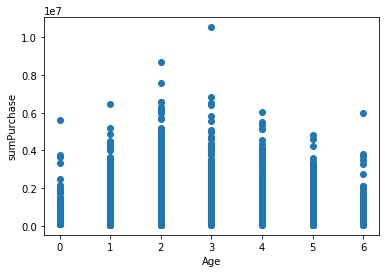

In [45]:
# Change the line plot below to a scatter plot
plt.scatter(user_data['Age'],user_data['sumPurchase'])
plt.xlabel('Age')
plt.ylabel('sumPurchase')
# Show plot
plt.show()

 According to the distribution of `sumPurchase` with `Age`, correlation value between `Age` and `sumPurchase` is not that significant. The result will be similar if we get the distribution of `countProduct` with `Age`. So, we can just conclude that age group of 2 (26-35) and 3 (36 -45) spend more money in Black Friday than other age groups. 

<br>

 Below is the heatmap of spearman correlation value between the `selected_features`.

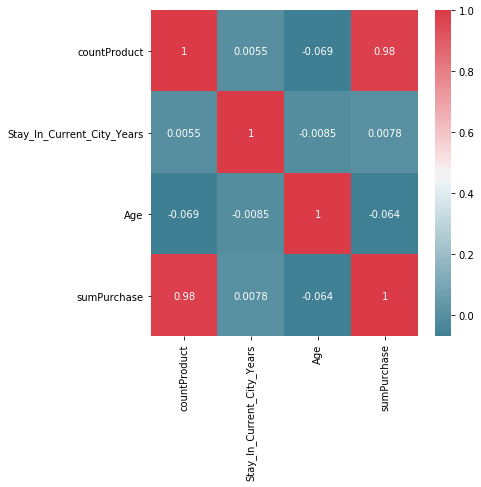

In [44]:
f, ax = plt.subplots(figsize=(6, 6))
corrmat = user_data[selected_features].corr(method = 'spearman')
sns.heatmap(corrmat, mask=np.zeros_like(corrmat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

<br>
<br>

## 4. Analyze correlation between `Product Category` and other features.

 Through the step **3**, we analyzed the correlation between the features explaining the users. In this step, we want to find the correlation using `Product_Category` in which the items that the user bought belongs. To analyze the correlation between `Product_Category_1` and other features of the data, we're going to use both of the features of products and the features of users. 

  Also, we'll only find the pearson correlation between the features. We thought that spearman rank correlation analysis is not that meaningful because the variables of target feature `Product_Category_1` are not rank-ordered. `Product_Category_1` is just categorical data encoded as integers. 

<br>

#### Pearson correlation between `Product_Category_1` and other features

In [54]:
# spearman correlation value between Purchase and selected features
corr = data_c.corr(method = 'pearson')
print (corr['Product_Category_1'].sort_values(ascending=False)[:10],'\n') 

Product_Category_1            1.000000
Age                           0.061951
Gender                        0.045661
Marital_Status                0.020546
User_ID                       0.003687
Stay_In_Current_City_Years   -0.004182
Occupation                   -0.008114
City_Category                -0.027444
Purchase                     -0.314125
Name: Product_Category_1, dtype: float64 



The values above are the pearson correlation values between `Product_Category_1` and other features. When we convert the correlation values to absolute values, `Purchase` has the largest value among the features. In the case of the features related to users, `Age` has the largest absolute value of correlation with `Product_Category_1`. Therefore, we are going to look at the relationship betwen `Age` and `Product_Category_1` closely. 

##### Frequency of `Product_Category_1` group by each Age group

In [55]:
# freqeuncy of product_category_1 group by each age group
age_category = data_c.groupby(["Age", "Product_Category_1"]).size()
age_category

Age  Product_Category_1
0    1                      3524
     2                       789
     3                      1180
     4                       744
     5                      4280
     6                       392
     7                        51
     8                      2213
     9                        16
     10                      108
     11                      728
     12                      120
     13                      108
     14                       37
     15                      158
     16                      226
     17                        6
     18                       27
1    1                     26627
     2                      4348
     3                      4633
     4                      2436
     5                     28157
     6                      3711
     7                       474
     8                     17665
     9                        61
     10                      596
     11                     4549
     12            

The data above shows the freqeuncy of `Product_Category_1` in each age group. We found that the most frequent `Product_Category_1` varies according to the age group. Also, **Top 2 or 3 frequency** in each age group has significant difference from other values of frequency in the same age group. Here, **Top 2 or 3 freqeuncy** are the 2 or 3 frequency values that have largest value among the frequency values in the same age group. Based on this idea, we can use `Age` to recommend some products to each user. To be more specific, according to the analysis, there are specific **product categories** that each age group tends to buy and it made us think that the categories of the product reflect the users' preferences. Therefore, we assumed that if we recommend the products to users using their `Age` information, we would get a better performance in recommendation. 

encoding
latter step model buid 할 때 correlation user feature 중 age product category
user based cf 
meta data 를 이용할 때 age 사용할 수 잇다. 